# SARIMA Model for Time Series Analysis

In this notebook, we demonstrate the use of a Seasonal ARIMA (SARIMA) model to analyze a synthetic time series that contains a linear trend, seasonality, and random noise. SARIMA is an extension of the ARIMA model that accounts for both seasonal and non-seasonal components.

We will walk through the following steps:
1. Generate a synthetic time series with trend, seasonality, and noise.
2. Fit a SARIMA model to the time series data.
3. Examine the residuals of the model to ensure it properly captures the time series dynamics.
4. Forecast future values using the SARIMA model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

## Step 1: Generate the Synthetic Time Series

The time series we generate contains the following components:
- **Trend**: A linear upward trend over time.
- **Seasonality**: A sinusoidal pattern with a period of 20 time steps.
- **Noise**: Normally distributed random noise added to each data point.

This combination of components is typical of real-world time series that exhibit both long-term patterns (trend) and repeating short-term cycles (seasonality).

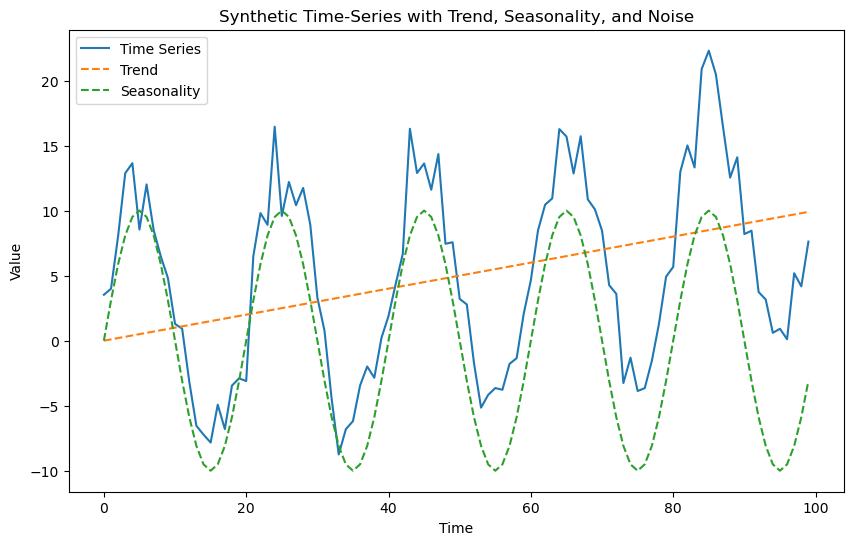

In [2]:
# Set the random seed for reproducibility
np.random.seed(0)

# Create a time index from 0 to 99
time = np.arange(100)

# Generate a linear trend
trend = 0.1 * time

# Generate a seasonal component with a period of 20
seasonal = 10 * np.sin(2 * np.pi * time / 20)

# Generate some random noise
noise = np.random.normal(scale=2, size=100)

# Combine these components to form the time series
series = trend + seasonal + noise

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time, series, label='Time Series')
plt.plot(time, trend, '--', label='Trend')
plt.plot(time, seasonal, '--', label='Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time-Series with Trend, Seasonality, and Noise')
plt.legend()
plt.show()

## Step 2: Fit a SARIMA Model to the Time Series

Next, we will use the **SARIMA (Seasonal AutoRegressive Integrated Moving Average)** model to fit the time series. SARIMA extends ARIMA by accounting for seasonality through additional seasonal autoregressive and moving average terms.

We specify the model as follows:
- \( (p, d, q) \): The non-seasonal ARIMA terms (autoregressive, differencing, and moving average).
- \( (P, D, Q, m) \): The seasonal ARIMA terms, where \(m\) is the seasonal period (set to 20 in this case).

We will fit the model using the `SARIMAX` function from the `statsmodels` library.

In [3]:
# Create a Pandas DataFrame to use in SARIMA modeling
data = pd.DataFrame({'Time': time, 'Series': series})

# Fit the SARIMA model (seasonal ARIMA)
sarima_model = SARIMAX(data['Series'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 20))
sarima_fit = sarima_model.fit()

# Print model summary
print(sarima_fit.summary())

/Users/victormpreciado/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95082D+00    |proj g|=  2.99240D-01

At iterate    5    f=  1.82754D+00    |proj g|=  6.13232D-02

At iterate   10    f=  1.82434D+00    |proj g|=  1.36856D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     17      1     0     0   3.694D-06   1.824D+00
  F =   1.8243407355520533     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  

## Step 3: Analyze Residuals

Once we fit the model, it is important to check the residuals (the differences between the actual and predicted values) to ensure that they behave like white noise. This means that:
- The residuals should have no discernible patterns.
- The residuals should be uncorrelated with each other.

To check this, we will:
1. Plot the residuals to visually inspect their behavior.
2. Plot the Autocorrelation Function (ACF) of the residuals to check for any remaining autocorrelation.


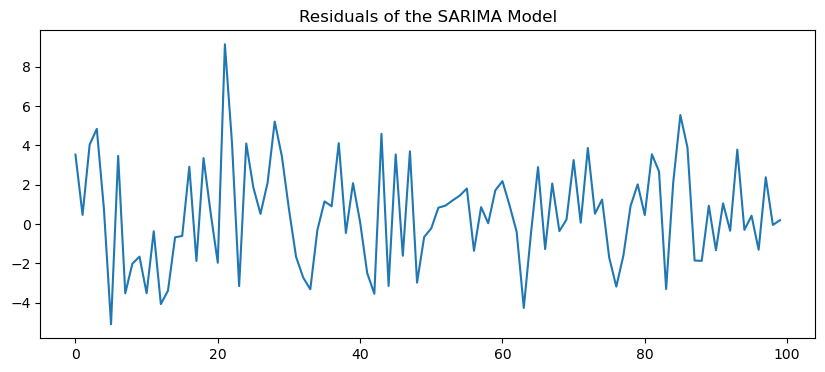

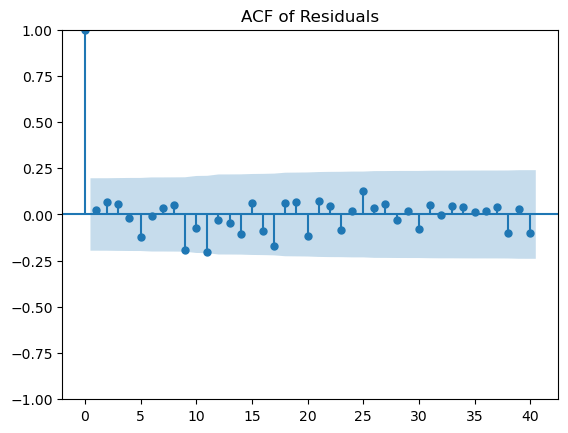

In [4]:
# Plot residuals
residuals = sarima_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of the SARIMA Model')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

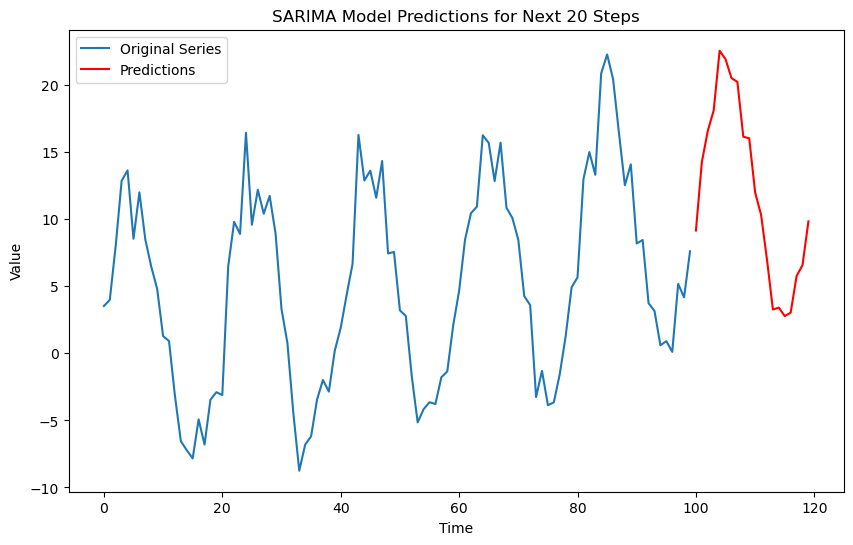

In [5]:
# Generate predictions for the next 20 time steps
predictions = sarima_fit.predict(start=len(data), end=len(data) + 19)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(data)), data['Series'], label='Original Series')
plt.plot(np.arange(len(data), len(data) + len(predictions)), predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Model Predictions for Next 20 Steps')
plt.legend()
plt.show()